In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
Y_train=Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
Y_test = Y_test.reshape(-1,)

In [ ]:
def plot_sample(X,y,index):

   plt.figure(figsize=(15,2))
   plt.imshow(X_train[index])
   plt.xlabel(classes[y[index]])

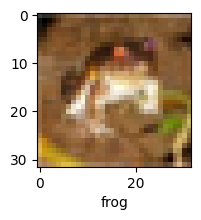

In [ ]:
plot_sample(X_train,Y_train,0)

In [ ]:
X_train[0]/255.0

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
X_test=X_test/255.0

In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters=48,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, Y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 11s 5ms/step - loss: 2.0001 - accuracy: 0.3173
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5735 - accuracy: 0.4292
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4608 - accuracy: 0.4747
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3719 - accuracy: 0.5112
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2753 - accuracy: 0.5509
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2015 - accuracy: 0.5779
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1457 - accuracy: 0.5969
Epoch 8/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0996 - accuracy: 0.6165
Epoch 9/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0516 - accuracy: 0.6302
Epoch 10/100
1563/1563 [==============================] - 6s 4ms/step - 

In [ ]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.5299 - accuracy: 0.1021


[3.5298731327056885, 0.10209999978542328]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.0667614e-02, 7.5789844e-03, 9.5030174e-02, 2.9947376e-01,
        2.0572594e-01, 7.6310545e-02, 1.9013779e-01, 2.7547132e-02,
        5.0934669e-02, 1.6593367e-02],
       [5.6145880e-03, 1.4710123e-05, 1.4541134e-01, 3.7045979e-01,
        4.2223319e-01, 1.1304210e-02, 4.2939898e-02, 4.4326734e-05,
        1.7657232e-03, 2.1222218e-04],
       [7.6128868e-03, 4.6031834e-03, 8.2347892e-02, 2.3222402e-01,
        2.4568595e-01, 3.9510015e-02, 3.5883865e-01, 4.9602282e-03,
        1.4494811e-02, 9.7223120e-03],
       [1.7663555e-02, 9.5691276e-04, 9.8739438e-02, 4.1809034e-01,
        2.4929105e-01, 4.1750871e-02, 1.4804767e-01, 7.9658348e-03,
        1.5318962e-02, 2.1754107e-03],
       [2.1840658e-02, 6.3023986e-03, 1.2462122e-01, 2.0141590e-01,
        3.3579427e-01, 6.9618441e-02, 1.7061312e-01, 2.9300787e-02,
        2.7948430e-02, 1.2544784e-02]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 4, 6, 3, 4]

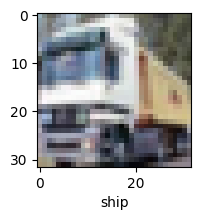

In [ ]:
plot_sample(X_test, Y_test,1)

In [ ]:
classes[y_classes[1]]

'deer'